# Unit 5 - Financial Planning


In [1]:
# Initial imports
!pip install alpaca-trade-api

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
BTC = 1.2
ETH = 5.3


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

url_BTC = btc_url + "?format=json"
url_ETH = eth_url + "?format=json"

requests.get(url_BTC)
requests.get(url_ETH)

BTC_response_data = requests.get(url_BTC)
ETH_response_data = requests.get(url_ETH)

BTC_response_content = BTC_response_data.content
ETH_response_content = ETH_response_data.content

import json

BTC_data = BTC_response_data.json()
ETH_data = ETH_response_data.json()

In [5]:
# Fetch current BTC price
btc_price = BTC_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_price = ETH_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
total_btc_value = BTC * btc_price
total_eth_value = ETH * eth_price

# Print current crypto wallet balance
print(f"The current value of your {BTC} BTC is ${total_btc_value:0.2f}")
print(f"The current value of your {ETH} ETH is ${total_eth_value:0.2f}")

The current value of your 1.2 BTC is $52566.00
The current value of your 5.3 ETH is $7187.17


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Current amount of shares
SPY = 50
AGG = 200

In [7]:
# Set Alpaca API key and secret

import os
from dotenv import load_dotenv ## We need this library to load the .env file
from pathlib import Path


### This loads the .env file to memory that is in a different folder as our notebook
#rel_path = Path("../Unsolved/.env") ## the two dots mean 'go up one step from the current directory'
abs_path = Path(r'C:\Users\yaone\OneDrive\Documents\.env')
load_dotenv(abs_path) 

alpaca_api_key = os.getenv('alpaca_api_key')


alpaca_secret_key = os.getenv("alpaca_secret_key")

base_url = 'https://paper-api.alpaca.markets'

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version = "V2")
alpaca

In [8]:
# Format current date as ISO format
today = pd.Timestamp("2021-02-17", tz = "America/New_York").isoformat()
today

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df

df_portfolio

# Get current closing prices for SPY and AGG
df_closing_prices = pd.DataFrame()

df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]


# Preview DataFrame
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices

,AGG,SPY
2021-02-17,116.28,392.43


In [9]:
# Pick AGG and SPY close prices
agg_close_price = 116.28
spy_close_price = 392.43

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.28
Current SPY closing price: $392.43


In [10]:
# Compute the current value of shares
my_spy_value = spy_close_price * SPY
my_agg_value = agg_close_price * AGG

# Print current value of share
print(f"The current value of your {SPY} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {AGG} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19621.50
The current value of your 200 AGG shares is $23256.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000
crypto_value = total_btc_value + total_eth_value
shares =  my_spy_value + my_agg_value

# Create savings DataFrame
value_data = {
    "Crypto": [crypto_value],
    "Shares": [shares]
}

df_savings = pd.DataFrame(value_data, index = ["Amount"]).T

# Display savings DataFrame
display(df_savings)

,Amount
Crypto,59753.171
Shares,42877.500


<AxesSubplot:title={'center':'Savings Portfolio'}, ylabel='Amount'>

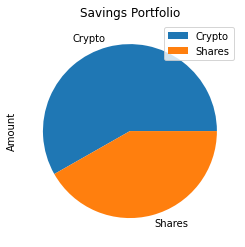

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'Amount', title = "Savings Portfolio")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()[0]

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations, you have more than 3x your monthly income in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your goal of 3x your monthly income in your emergency fund.")
else:
    print(f'You are ${emergency_fund - total_savings} away from reaching your goal of 3x your monthly income in your emergency fund.')
    


Congratulations, you have more than 3x your monthly income in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-02-18', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-18', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
ticker = ["SPY", "AGG"]

timeframe = "1D"

df_stock_data = alpaca.get_barset(
    ticker,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display sample data
df_stock_data.head()

AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2020-09-25 00:00:00-04:00  118.12  118.17  118.0500  118.13  4895506  322.58   
2020-09-28 00:00:00-04:00  118.18  118.22  118.1100  118.20  5318716  333.22   
2020-09-29 00:00:00-04:00  118.28  118.33  118.2100  118.23  3974292  333.97   
2020-09-30 00:00:00-04:00  118.26  118.26  117.9516  118.07  5314447  333.09   
2020-10-01 00:00:00-04:00  117.81  118.04  117.7500  117.99  9535086  337.69   

                                                               
                             high       low   close    volume  
time                                                           
2020-09-25 00:00:00-04:00  329.58  321.6400  328.69  59224994  
2020-09-28 00:00:00-04:00  334.96  332.1500  334.20  55126711  
2020-09-29 00:00:00-04:00  334.77  331.6209  332.39  40380416  
2020-09-30 00:00:00-04:00  338.29  332.8800  334.89  78401575  
2020-10-01 00:00:00-04:00  338.74  335.0100  337.03  76998987

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Printing the simulation input data
MC_thirty_year.portfolio_data.head()

AGG                                     \
                             open    high       low   close   volume   
time                                                                   
2020-09-25 00:00:00-04:00  118.12  118.17  118.0500  118.13  4895506   
2020-09-28 00:00:00-04:00  118.18  118.22  118.1100  118.20  5318716   
2020-09-29 00:00:00-04:00  118.28  118.33  118.2100  118.23  3974292   
2020-09-30 00:00:00-04:00  118.26  118.26  117.9516  118.07  5314447   
2020-10-01 00:00:00-04:00  117.81  118.04  117.7500  117.99  9535086   

                                           SPY                            \
                          daily_return    open    high       low   close   
time                                                                       
2020-09-25 00:00:00-04:00          NaN  322.58  329.58  321.6400  328.69   
2020-09-28 00:00:00-04:00     0.000593  333.22  334.96  332.1500  334.20   
2020-09-29 00:00:00-04:00     0.000254  333.97  334.77  331.6209  332.39   
2020-09-30 00:00:00-04:00    -0.001353  333.09  338.29  332.8800  334.89   
2020-10-01 00:00:00-04:00    -0.000678  337.69  338.74  335.0100  337.03   

                                                  
                             volume daily_return  
time                                              
2020-09-25 00:00:00-04:00  59224994          NaN  
2020-09-28 00:00:00-04:00  55126711     0.016764  
2020-09-29 00:00:00-04:00  40380416    -0.005416  
2020-09-30 00:00:00-04:00  78401575     0.007521  
2020-10-01 00:00:00-04:00  76998987     0.006390

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998151,0.998273,1.006803,0.999700,1.005932,1.004581,1.002866,0.999897,0.996378,1.008461,...,1.005232,0.999505,1.004690,0.994868,0.998517,1.004245,1.001388,0.994825,0.997739,0.999460
2,0.999076,0.997673,1.016564,1.007434,1.009411,1.011605,1.004126,0.999084,1.002617,1.015504,...,1.008296,1.000827,1.011657,0.995923,0.998215,1.010625,1.006165,0.997490,0.998904,0.999518
3,1.006915,0.989517,1.019946,1.008026,1.004801,1.014924,1.004830,1.005298,0.997779,1.012841,...,1.005556,1.002128,1.003394,0.995689,0.994208,1.010547,1.011617,0.999129,1.002381,0.991191
4,1.008156,0.992515,1.021612,1.005604,1.001715,1.008422,1.004794,1.004572,1.000301,1.011738,...,1.002976,0.998589,1.001226,0.997242,0.995194,1.013743,1.010306,0.997356,0.999856,0.996688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,55.758177,85.741488,62.420125,98.975826,92.474270,83.156583,74.764298,122.523413,125.788423,148.400950,...,79.813421,165.368649,132.367031,104.684996,193.949342,105.232350,209.136598,82.303196,74.713159,158.888591
7557,56.240392,85.827198,62.208402,99.775293,93.366924,82.616149,74.868101,123.002670,125.608596,149.564997,...,80.488140,165.307034,132.315905,104.933311,194.976805,105.395183,208.621536,82.634318,74.930829,158.732699
7558,56.186850,85.903830,62.087343,100.393083,93.510384,83.074632,74.950308,123.822473,125.804434,149.909145,...,80.754939,165.015258,133.354354,104.583531,194.711387,105.533731,208.888597,82.873322,74.774062,160.304624
7559,56.572425,85.693256,62.294774,99.839316,93.079587,82.890511,74.562987,123.628378,125.571353,150.373999,...,80.740254,165.946937,133.604587,104.400112,193.835705,105.297951,210.473088,83.852556,74.628517,160.011821


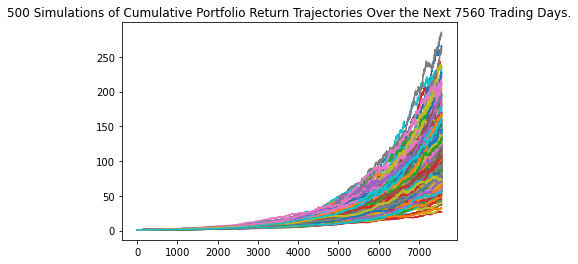

In [19]:
# Plot simulation outcomes
line_plot = MC_thirty_year.plot_simulation()

line_plot.get_figure().savefig("MC_thirty_year_sim_plot.png", bbox_inches = "tight")

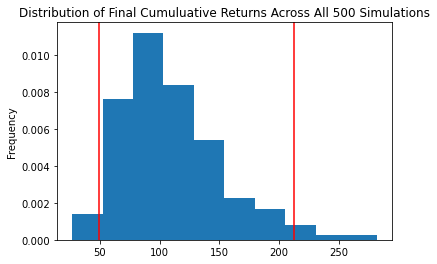

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirty_year.plot_distribution()

dist_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png', bbox_inches = 'tight')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean            109.375727
std              41.384316
min              26.843311
25%              80.739566
50%             101.250479
75%             132.358561
max             281.435952
95% CI Lower     49.061724
95% CI Upper    212.808026
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $981234.47 and $4256160.52


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1471851.71 and $6384240.78


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")